In [67]:
import os
os.chdir('../')
import numpy as np
import matplotlib.pyplot as plt

In [68]:
from redunet import ReduNetVector
import utils_example as ue
import plot

## Hyperparameters

In [69]:
## Data
dataset = 1  # can be 1 to 8
train_noise = 0.2
test_noise = 0.2
train_samples = 100
test_samples = 100

## Model
num_layers = 200  # number of redunet layers
eta = 0.5
eps = 0.1
lmbda = 200

## Data

In [70]:
X_train, y_train, num_classes = ue.generate_2d(dataset, train_noise, train_samples) # train
X_train2, y_train2, num_classes = ue.generate_2d(dataset, train_noise, train_samples) # train
X_test, y_test, num_classes = ue.generate_2d(dataset, test_noise, test_samples) # test
print(X_train.shape)
print(y_train.shape)
#print(y_train)

torch.Size([200, 2])
torch.Size([200])


## Model

In [71]:
net = ReduNetVector(num_classes, num_layers, X_train.shape[1], eta=eta, eps=eps, lmbda=lmbda)
Z_train = net.init(X_train, y_train)

0 | 0.569484 2.397825 1.828341
1 | 0.578420 2.397826 1.819406
2 | 0.587423 2.397827 1.810404
3 | 0.596485 2.397829 1.801344
4 | 0.605594 2.397830 1.792236
5 | 0.614738 2.397831 1.783092
6 | 0.623906 2.397832 1.773926
7 | 0.633083 2.397833 1.764750
8 | 0.642255 2.397834 1.755579
9 | 0.651407 2.397835 1.746428
10 | 0.660523 2.397837 1.737314
11 | 0.669586 2.397838 1.728252
12 | 0.678579 2.397839 1.719260
13 | 0.687483 2.397840 1.710357
14 | 0.696281 2.397841 1.701559
15 | 0.704956 2.397842 1.692886
16 | 0.713487 2.397843 1.684355
17 | 0.721859 2.397844 1.675985
18 | 0.730051 2.397845 1.667793
19 | 0.738051 2.397846 1.659795
20 | 0.745838 2.397847 1.652008
21 | 0.753401 2.397848 1.644447
22 | 0.760725 2.397849 1.637123
23 | 0.767798 2.397849 1.630051
24 | 0.774611 2.397850 1.623240
25 | 0.781153 2.397851 1.616698
26 | 0.787420 2.397851 1.610432
27 | 0.793405 2.397852 1.604447
28 | 0.799107 2.397853 1.598747
29 | 0.804522 2.397854 1.593332
30 | 0.809654 2.397855 1.588201
31 | 0.814503 2.39

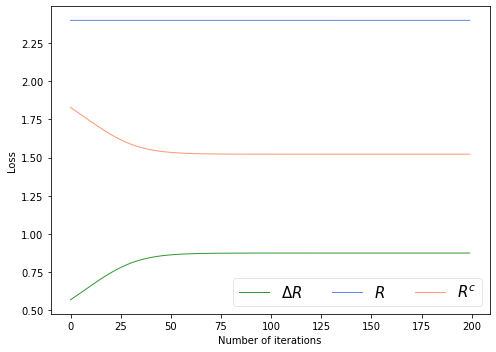

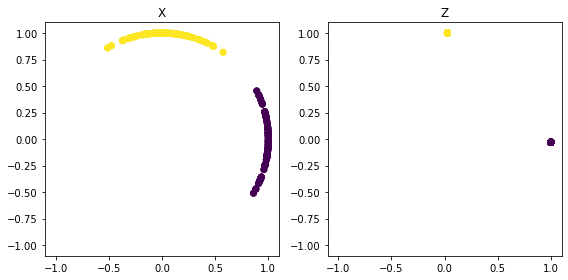

In [72]:
ue.plot_loss_mcr(net.get_loss())
ue.plot_2d(X_train, y_train, Z_train)  

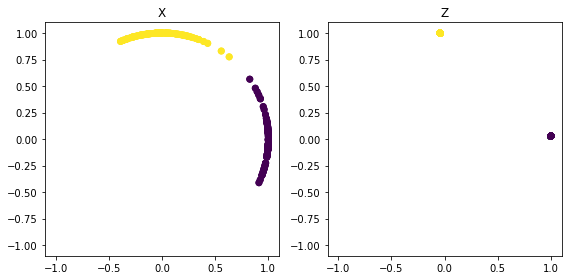

In [29]:
Z_test = net(X_test).detach()
ue.plot_2d(X_test, y_test, Z_test)

# TEST SECTION

In [10]:
centers = [[0,1],[1,0]]
for a,b in enumerate(centers):
    print(a)
    print(b)

0
[0, 1]
1
[1, 0]


In [37]:
targets = []
y = np.repeat(2, 9).tolist()
print(y)
for i in range(2):
    targets += y
print(targets)

[2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [64]:
center1 =  (1, 0)
center2 =  (0, 1)
samples = 100
noise = 0.2
inputs = np.random.normal(loc=center1, scale=noise, size=(samples, 2))
inputs = inputs / np.linalg.norm(inputs, axis=1, ord=2, keepdims=True)
outputs = np.random.normal(loc=center2, scale=noise, size=(samples, 2))

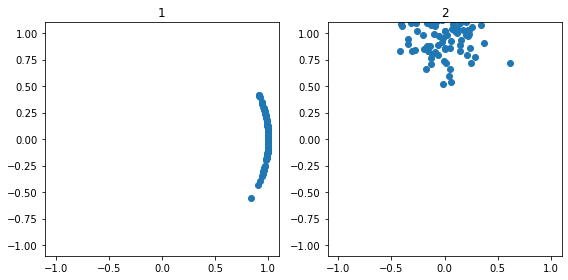

In [65]:

fig, ax = plt.subplots(ncols=2, figsize=(8, 4))

ax[0].scatter(inputs[:, 0], inputs[:, 1])
ax[0].set_ylim([-1.1, 1.1])
ax[0].set_xlim([-1.1, 1.1])
ax[0].set_title('1')

ax[1].scatter(outputs[:, 0], outputs[:, 1])
ax[1].set_ylim([-1.1, 1.1])
ax[1].set_xlim([-1.1, 1.1])
ax[1].set_title('2')
fig.tight_layout()
plt.show()
plt.close() 

Minist Example